<a href="https://colab.research.google.com/github/panda1230/pytorch-cnn-visualizations/blob/master/vgg19_cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''Initialize the network architecture'''

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.backends.cudnn as cudnn

import torchvision
import torchvision.transforms as transforms

import os
import time
import numpy as np
import matplotlib.pyplot as plt


size_1 = 64
size_2 = 64
size_4 = 128
size_5 = 128
size_7 = 256
size_8 = 256
size_9 = 256
size_10 = 256
size_12 = 512
size_13 = 512
size_14 = 512
size_15 = 512
size_17 = 512
size_18 = 512
size_19 = 512
size_20 = 512



class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 3 input channels for CIFAR10, VGG11 calls for 64 output channels from 
        # the first conv layer, a batchnorm, then a ReLU
        self.conv1 = nn.Conv2d(3, size_1, kernel_size = 3, padding = 1)
        self.norm1 = nn.BatchNorm2d(64)
        self.relu1 = nn.ReLU()
        
        #layer 2 is a conv that produces 64 channels, same format as layer 1
        self.conv2 = nn.Conv2d(size_1, size_2, kernel_size = 3, padding = 1)
        self.norm2 = nn.BatchNorm2d(size_1)
        self.relu2 = nn.ReLU()
        
        #layer 3 is a pooling layer
        self.pool3 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        #layer 4 is a conv that produces 128 channels, same format as layer 1
        self.conv4 = nn.Conv2d(size_2, size_4, kernel_size = 3, padding = 1)
        self.norm4 = nn.BatchNorm2d(size_4)
        self.relu4 = nn.ReLU()
        
        #layer 5 is a conv that produces 128 channels, same format as layer 1
        self.conv5 = nn.Conv2d(size_4, size_5, kernel_size = 3, padding = 1)
        self.norm5 = nn.BatchNorm2d(size_5)
        self.relu5 = nn.ReLU()
        
        #layer 6 is a pooling layer
        self.pool6 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        #layer 7 is a conv that produces 256 channels, same format as layer 1
        self.conv7 = nn.Conv2d(size_5, size_7, kernel_size = 3, padding = 1)
        self.norm7 = nn.BatchNorm2d(size_7)
        self.relu7 = nn.ReLU()
        
        #layer 8 is a conv that produces 256 channels, same format as layer 1
        self.conv8 = nn.Conv2d(size_7, size_8, kernel_size = 3, padding = 1)
        self.norm8 = nn.BatchNorm2d(size_8)
        self.relu8 = nn.ReLU()
        
        #layer 9 is a conv that produces 256 channels, same format as layer 1
        self.conv9 = nn.Conv2d(size_8, size_9, kernel_size = 3, padding = 1)
        self.norm9 = nn.BatchNorm2d(size_9)
        self.relu9 = nn.ReLU()
        
        #layer 10 is a conv that produces 256 channels, same format as layer 1
        self.conv10 = nn.Conv2d(size_9, size_10, kernel_size = 3, padding = 1)
        self.norm10 = nn.BatchNorm2d(size_10)
        self.relu10 = nn.ReLU()
        
        #layer 11 is a pooling layer
        self.pool11 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        #layer 12 is a conv that produces 512 channels, same format as layer 1
        self.conv12 = nn.Conv2d(size_10, size_12, kernel_size = 3, padding = 1)
        self.norm12 = nn.BatchNorm2d(size_12)
        self.relu12 = nn.ReLU()
        
        #layer 13 is a conv that produces 512 channels, same format as layer 1
        self.conv13 = nn.Conv2d(size_12, size_13, kernel_size = 3, padding = 1)
        self.norm13 = nn.BatchNorm2d(size_13)
        self.relu13 = nn.ReLU()
        
        #layer 14 is a conv that produces 512 channels, same format as layer 1
        self.conv14 = nn.Conv2d(size_13, size_14, kernel_size = 3, padding = 1)
        self.norm14 = nn.BatchNorm2d(size_14)
        self.relu14 = nn.ReLU()
        
        #layer 15 is a conv that produces 512 channels, same format as layer 1
        self.conv15 = nn.Conv2d(size_14, size_15, kernel_size = 3, padding = 1)
        self.norm15 = nn.BatchNorm2d(size_15)
        self.relu15 = nn.ReLU()
        
        #layer 16 is a pooling layer
        self.pool16 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        #layer 17 is a conv that produces 512 channels, same format as layer 1
        self.conv17 = nn.Conv2d(size_15, size_17, kernel_size = 3, padding = 1)
        self.norm17 = nn.BatchNorm2d(size_17)
        self.relu17 = nn.ReLU()
        
        #layer 18 is a conv that produces 512 channels, same format as layer 1
        self.conv18 = nn.Conv2d(size_17, size_18, kernel_size = 3, padding = 1)
        self.norm18 = nn.BatchNorm2d(size_18)
        self.relu18 = nn.ReLU()
        
        #layer 19 is a conv that produces 512 channels, same format as layer 1
        self.conv19 = nn.Conv2d(size_18, size_19, kernel_size = 3, padding = 1)
        self.norm19 = nn.BatchNorm2d(size_19)
        self.relu19 = nn.ReLU()
        
        #layer 20 is a conv that produces 512 channels, same format as layer 1
        self.conv20 = nn.Conv2d(size_19, size_20, kernel_size = 3, padding = 1)
        self.norm20 = nn.BatchNorm2d(size_20)
        self.relu20 = nn.ReLU()
        
        #layer 21 is a pooling layer
        self.pool21 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        #layer 22 is an average pooling layer
        self.pool22 = nn.AvgPool2d(kernel_size=1, stride=1)
        
        #layer 23 is a fully connected layer
        self.full23 = nn.Linear(size_20, 100)
        
        

    def forward(self, x0):
        x1 = self.conv1(x0)
        x1 = self.norm1(x1)
        x1 = self.relu1(x1)
        
        x2 = self.conv2(x1)
        x2 = self.norm2(x2)
        x2 = self.relu2(x2)
        
        x3 = self.pool3(x2)
        
        x4 = self.conv4(x3)
        x4 = self.norm4(x4)
        x4 = self.relu4(x4)
        
        x5 = self.conv5(x4)
        x5 = self.norm5(x5)
        x5 = self.relu5(x5)
        
        x6 = self.pool6(x5)
        
        x7 = self.conv7(x6)
        x7 = self.norm7(x7)
        x7 = self.relu7(x7)
        
        x8 = self.conv8(x7)
        x8 = self.norm8(x8)
        x8 = self.relu8(x8)
        
        x9 = self.conv9(x8)
        x9 = self.norm9(x9)
        x9 = self.relu9(x9)
        
        x10 = self.conv10(x9)
        x10 = self.norm10(x10)
        x10 = self.relu10(x10)
        
        x11 = self.pool11(x10)
        
        x12 = self.conv12(x11)
        x12 = self.norm12(x12)
        x12 = self.relu12(x12)
        
        x13 = self.conv13(x12)
        x13 = self.norm13(x13)
        x13 = self.relu13(x13)
        
        x14 = self.conv14(x13)
        x14 = self.norm14(x14)
        x14 = self.relu14(x14)
        
        x15 = self.conv15(x14)
        x15 = self.norm15(x15)
        x15 = self.relu15(x15)
        
        x16 = self.pool16(x15)
        
        x17 = self.conv17(x16)
        x17 = self.norm17(x17)
        x17 = self.relu17(x17)
        
        x18 = self.conv18(x17)
        x18 = self.norm18(x18)
        x18 = self.relu18(x18)
        
        x19 = self.conv19(x18)
        x19 = self.norm19(x19)
        x19 = self.relu19(x19)
        
        x20 = self.conv20(x19)
        x20 = self.norm20(x20)
        x20 = self.relu20(x20)
       
        x21 = self.pool21(x20)
        
        x22 = self.pool22(x21)
        
        x22 = x22.view(x20.size(0), -1)
        x23 = self.full23(x22)
        
        #return the activations from each layer as well as the output
        output = x23
        activations = [x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18, x19, x20, x21]
        return output, activations

def test():
    net = Net()
    #net.eval()
    y, x = net(torch.randn(1,3,32,32))
    print(y.size())

test()

torch.Size([1, 100])


In [2]:
'''train network'''

device = 'cuda'
best_acc = 0  # best test accuracy
num_epochs = 210
num_layers = 22

absolute_layer_energies = np.zeros((num_epochs, num_layers))
fractional_layer_energies = np.zeros((num_epochs, num_layers))

# Data
print('==> Preparing data..')
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=256, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print('==> Building model..')
net = Net()
net = net.to(device)
net = torch.nn.DataParallel(net)
cudnn.benchmark = True

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)

test_acc = []

# Training
def train(epoch):
    print('\nEpoch: %d' % epoch)
    net.train()
    train_loss = 0
    correct = 0
    total = 0
    activations = []
    global absolute_layer_energies
    global fractional_layer_energies
    previous_time = time.process_time()
    
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs, activations = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
        if batch_idx%100==0:
            current_time = time.process_time()
            print(batch_idx, len(testloader), 'Lap time (s): %.2f | Loss: %.3f | Acc: %.3f%% (%d/%d)'
                    % (current_time - previous_time, train_loss/(batch_idx+1), 100.*correct/total, correct, total))
            previous_time = current_time
            
    this_epoch_abs_energies, this_epoch_frac_energies = count_non_zeros(activations)
    fractional_layer_energies[epoch] = this_epoch_frac_energies
    absolute_layer_energies[epoch] = this_epoch_abs_energies
    print('Total activation density: %.3f' % (fractional_layer_energies[epoch, 0]))


def test(epoch):
    global best_acc
    net.eval()
    test_loss = 0
    correct = 0
    total = 0
    activations = []
    previous_time = time.process_time()
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(testloader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs, activations = net(inputs)
            loss = criterion(outputs, targets)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
            acc = correct/total
            best_acc = max(acc, best_acc)
            if batch_idx%100 == 0:
                test_acc.append(acc)
                current_time = time.process_time()
                print(batch_idx, len(testloader), 'Lap time (s): %.2f | Loss: %.3f | Acc: %.3f%% (%d/%d) | Best acc: %.3f'
                    % (current_time - previous_time, test_loss/(batch_idx+1), 100.*correct/total, correct, total, best_acc))
                previous_time = current_time
            if acc>=best_acc:
                torch.save(net.state_dict(),'./sample_data/vgg19_net0.pth')


def count_non_zeros(activations): 
    
    #returns: numpy array containing the number of non-zero activations per layer (15x1)
    #         numpy array containing the fraction of non-zero activations per layer (15x1)
    
    n = 0
    num_zeros = np.zeros((22,), dtype = int)
    num_non_zeros = np.zeros((22,), dtype = int)
    total_activations = np.zeros((22,), dtype = int)
    fraction_non_zero = np.zeros((22,), dtype = float)
    for x in activations:
        n += 1
        #reshape activations into a flat list
        num_activations = x.size()[0] * x.size()[1] * x.size()[2] * x.size()[3]
        
        y = x.view(num_activations).tolist()
        
        #count how many entries are zero / non-zero
        num_zeros[n] = y.count(0)
        total_activations[n] = num_activations
        num_non_zeros[n] = len(y) - num_zeros[n]
        fraction_non_zero[n] = num_non_zeros[n].astype(float)/float(len(y))
        #print(n, num_non_zeros[n], len(y), '%.3f' % (fraction_non_zero[n]))
        
    #store total values in the zero slot
    num_non_zeros[0] = np.sum(num_non_zeros) 
    total_activations[0] = np.sum(total_activations)
    fraction_non_zero[0] = num_non_zeros[0].astype(float)/total_activations[0].astype(float)
    return num_non_zeros, fraction_non_zero

for epoch in range(num_epochs):
    if (epoch == 70):
        optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
    if (epoch == 140):
        optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4)
    train(epoch)
    test(epoch)
    print('Elapsed time: %.2f' % (time.process_time()))

size_1 = int(fractional_layer_energies[epoch,1] * 64)
size_2 = int(fractional_layer_energies[epoch,2] * 64)
size_4 = int(fractional_layer_energies[epoch,4] * 128)
size_5 = int(fractional_layer_energies[epoch,5] * 128)
size_7 = int(fractional_layer_energies[epoch,7] * 256)
size_8 = int(fractional_layer_energies[epoch,8] * 256)
size_9 = int(fractional_layer_energies[epoch,9] * 256)
size_10 = int(fractional_layer_energies[epoch,10] * 256)
size_12 = int(fractional_layer_energies[epoch,12] * 512)
size_13 = int(fractional_layer_energies[epoch,13] * 512)
size_14 = int(fractional_layer_energies[epoch,14] * 512)
size_15 = int(fractional_layer_energies[epoch,15] * 512)
size_17 = int(fractional_layer_energies[epoch,17] * 512)
size_18 = int(fractional_layer_energies[epoch,18] * 512)
size_19 = int(fractional_layer_energies[epoch,19] * 512)
size_20 = int(fractional_layer_energies[epoch,20] * 512)
print(size_1,size_2,size_4,size_5,size_7,size_8,size_9, size_10, size_12, size_13, size_14, size_15, size_17, size_18, size_19, size_20)



0it [00:00, ?it/s]

==> Preparing data..


100%|█████████▉| 168419328/169001437 [00:11<00:00, 17651286.45it/s]

Extracting ./data/cifar-100-python.tar.gz to ./data
Files already downloaded and verified
==> Building model..

Epoch: 0
0 100 Lap time (s): 0.52 | Loss: 4.840 | Acc: 0.781% (2/256)


169009152it [00:30, 17651286.45it/s]                               

100 100 Lap time (s): 4.87 | Loss: 5.201 | Acc: 1.199% (310/25856)
Total activation density: 0.487
0 100 Lap time (s): 0.16 | Loss: 4.614 | Acc: 1.000% (1/100) | Best acc: 0.010
Elapsed time: 25.02

Epoch: 1
0 100 Lap time (s): 0.12 | Loss: 4.648 | Acc: 3.125% (8/256)
100 100 Lap time (s): 5.10 | Loss: 4.618 | Acc: 1.176% (304/25856)
Total activation density: 0.488
0 100 Lap time (s): 0.07 | Loss: 4.611 | Acc: 2.000% (2/100) | Best acc: 0.020
Elapsed time: 38.09

Epoch: 2
0 100 Lap time (s): 0.11 | Loss: 4.583 | Acc: 0.781% (2/256)
100 100 Lap time (s): 4.91 | Loss: 4.571 | Acc: 1.365% (353/25856)
Total activation density: 0.492
0 100 Lap time (s): 0.08 | Loss: 4.521 | Acc: 2.000% (2/100) | Best acc: 0.022
Elapsed time: 50.82

Epoch: 3
0 100 Lap time (s): 0.11 | Loss: 4.499 | Acc: 1.953% (5/256)
100 100 Lap time (s): 4.95 | Loss: 4.452 | Acc: 2.092% (541/25856)
Total activation density: 0.507
0 100 Lap time (s): 0.07 | Loss: 4.253 | Acc: 5.000% (5/100) | Best acc: 0.050
Elapsed time: 6

Text(0.5, 0.98, 'Fractional activation energy (sparsity) vs. epoch')

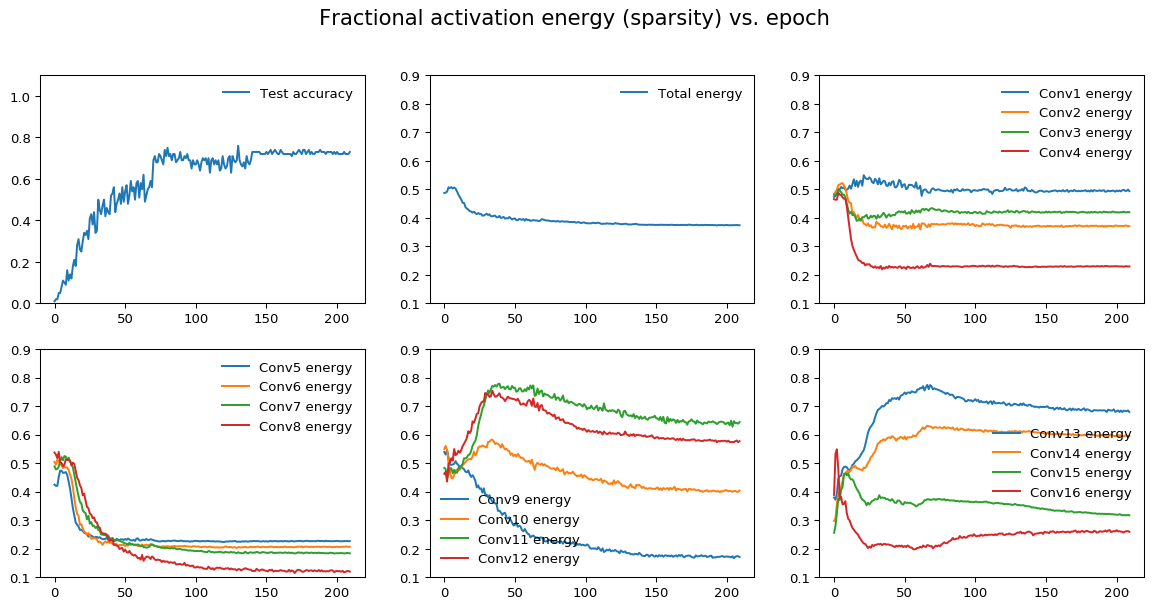

In [3]:

total_energy = fractional_layer_energies[:,0]
conv1_energy = fractional_layer_energies[:,1]
conv2_energy = fractional_layer_energies[:,2]
conv3_energy = fractional_layer_energies[:,4]
conv4_energy = fractional_layer_energies[:,5]
conv5_energy = fractional_layer_energies[:,7]
conv6_energy = fractional_layer_energies[:,8]
conv7_energy = fractional_layer_energies[:,9]
conv8_energy = fractional_layer_energies[:,10]
conv9_energy = fractional_layer_energies[:,12]
conv10_energy = fractional_layer_energies[:,13]
conv11_energy = fractional_layer_energies[:,14]
conv12_energy = fractional_layer_energies[:,15]
conv13_energy = fractional_layer_energies[:,17]
conv14_energy = fractional_layer_energies[:,18]
conv15_energy = fractional_layer_energies[:,19]
conv16_energy = fractional_layer_energies[:,20]



ylim = 0.9
ylow = 0.1 

fig = plt.figure(1, figsize=(15, 7), dpi=95)
plt.subplot(231)
plt.ylim(0, 1.1)
plt.plot(test_acc, label = 'Test accuracy')
plt.legend(frameon = False)

plt.subplot(232)
plt.ylim(ylow, ylim)
plt.plot(total_energy, label = 'Total energy')
plt.legend(frameon = False)

plt.subplot(233)
plt.ylim(ylow, ylim)
plt.plot(conv1_energy, label = 'Conv1 energy')
plt.plot(conv2_energy, label = 'Conv2 energy')
plt.plot(conv3_energy, label = 'Conv3 energy')
plt.plot(conv4_energy, label = 'Conv4 energy')
plt.legend(frameon = False)

plt.subplot(234)
plt.ylim(ylow, ylim)
plt.plot(conv5_energy, label = 'Conv5 energy')
plt.plot(conv6_energy, label = 'Conv6 energy')
plt.plot(conv7_energy, label = 'Conv7 energy')
plt.plot(conv8_energy, label = 'Conv8 energy')
plt.legend(frameon = False)

plt.subplot(235)
plt.ylim(ylow, ylim)
plt.plot(conv9_energy, label = 'Conv9 energy')
plt.plot(conv10_energy, label = 'Conv10 energy')
plt.plot(conv11_energy, label = 'Conv11 energy')
plt.plot(conv12_energy, label = 'Conv12 energy')
plt.legend(frameon = False)

plt.subplot(236)
plt.ylim(ylow, ylim)
plt.plot(conv13_energy, label = 'Conv13 energy')
plt.plot(conv14_energy, label = 'Conv14 energy')
plt.plot(conv15_energy, label = 'Conv15 energy')
plt.plot(conv16_energy, label = 'Conv16 energy')
plt.legend(frameon = False)


fig.suptitle('Fractional activation energy (sparsity) vs. epoch', fontsize = 16)

In [10]:
epoch = 10
size_1 = int(fractional_layer_energies[epoch,1] * 64)
size_2 = int(fractional_layer_energies[epoch,2] * 64)
size_4 = int(fractional_layer_energies[epoch,4] * 128)
size_5 = int(fractional_layer_energies[epoch,5] * 128)
size_7 = int(fractional_layer_energies[epoch,7] * 256)
size_8 = int(fractional_layer_energies[epoch,8] * 256)
size_9 = int(fractional_layer_energies[epoch,9] * 256)
size_10 = int(fractional_layer_energies[epoch,10] * 256)
size_12 = int(fractional_layer_energies[epoch,12] * 512)
size_13 = int(fractional_layer_energies[epoch,13] * 512)
size_14 = int(fractional_layer_energies[epoch,14] * 512)
size_15 = int(fractional_layer_energies[epoch,15] * 512)
size_17 = int(fractional_layer_energies[epoch,17] * 512)
size_18 = int(fractional_layer_energies[epoch,18] * 512)
size_19 = int(fractional_layer_energies[epoch,19] * 512)
size_20 = int(fractional_layer_energies[epoch,20] * 512)
print(size_1,size_2,size_4,size_5,size_7,size_8,size_9, size_10, size_12, size_13, size_14, size_15, size_17, size_18, size_19, size_20)

32 29 54 51 111 121 132 130 252 242 247 278 244 242 238 156


In [0]:
torch.save(fractional_layer_energies,'./sample_data/fraction_energy.pth')

In [0]:
'''Prune the network'''

epoch = 209

'''size_1 = 18
size_2 = 23
size_4 = 47
size_5 = 25
size_7 = 54
size_8 = 51
size_9 = 62
size_10 = 61
size_12 = 197
size_13 = 258
size_14 = 378
size_15 = 322
size_17 = 402
size_18 = 383
size_19 = 259
size_20 = 134'''
class Net1(nn.Module):

    def __init__(self):
        super(Net1, self).__init__()
        # print(size_1)
        # 3 input channels for CIFAR10, VGG11 calls for 64 output channels from 
        # the first conv layer, a batchnorm, then a ReLU
        self.conv1 = nn.Conv2d(3, size_1, kernel_size = 3, padding = 1)
        self.norm1 = nn.BatchNorm2d(size_1)
        self.relu1 = nn.ReLU()
        
        #layer 2 is a conv that produces 64 channels, same format as layer 1
        self.conv2 = nn.Conv2d(size_1, size_2, kernel_size = 3, padding = 1)
        self.norm2 = nn.BatchNorm2d(size_2)
        self.relu2 = nn.ReLU()
        
        #layer 3 is a pooling layer
        self.pool3 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        #layer 4 is a conv that produces 128 channels, same format as layer 1
        self.conv4 = nn.Conv2d(size_2, size_4, kernel_size = 3, padding = 1)
        self.norm4 = nn.BatchNorm2d(size_4)
        self.relu4 = nn.ReLU()
        
        #layer 5 is a conv that produces 128 channels, same format as layer 1
        self.conv5 = nn.Conv2d(size_4, size_5, kernel_size = 3, padding = 1)
        self.norm5 = nn.BatchNorm2d(size_5)
        self.relu5 = nn.ReLU()
        
        #layer 6 is a pooling layer
        self.pool6 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        #layer 7 is a conv that produces 256 channels, same format as layer 1
        self.conv7 = nn.Conv2d(size_5, size_7, kernel_size = 3, padding = 1)
        self.norm7 = nn.BatchNorm2d(size_7)
        self.relu7 = nn.ReLU()
        
        #layer 8 is a conv that produces 256 channels, same format as layer 1
        self.conv8 = nn.Conv2d(size_7, size_8, kernel_size = 3, padding = 1)
        self.norm8 = nn.BatchNorm2d(size_8)
        self.relu8 = nn.ReLU()
        
        #layer 9 is a conv that produces 256 channels, same format as layer 1
        self.conv9 = nn.Conv2d(size_8, size_9, kernel_size = 3, padding = 1)
        self.norm9 = nn.BatchNorm2d(size_9)
        self.relu9 = nn.ReLU()
        
        #layer 10 is a conv that produces 256 channels, same format as layer 1
        self.conv10 = nn.Conv2d(size_9, size_10, kernel_size = 3, padding = 1)
        self.norm10 = nn.BatchNorm2d(size_10)
        self.relu10 = nn.ReLU()
        
        #layer 11 is a pooling layer
        self.pool11 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        #layer 12 is a conv that produces 512 channels, same format as layer 1
        self.conv12 = nn.Conv2d(size_10, size_12, kernel_size = 3, padding = 1)
        self.norm12 = nn.BatchNorm2d(size_12)
        self.relu12 = nn.ReLU()
        
        #layer 13 is a conv that produces 512 channels, same format as layer 1
        self.conv13 = nn.Conv2d(size_12, size_13, kernel_size = 3, padding = 1)
        self.norm13 = nn.BatchNorm2d(size_13)
        self.relu13 = nn.ReLU()
        
        #layer 14 is a conv that produces 512 channels, same format as layer 1
        self.conv14 = nn.Conv2d(size_13, size_14, kernel_size = 3, padding = 1)
        self.norm14 = nn.BatchNorm2d(size_14)
        self.relu14 = nn.ReLU()
        
        #layer 15 is a conv that produces 512 channels, same format as layer 1
        self.conv15 = nn.Conv2d(size_14, size_15, kernel_size = 3, padding = 1)
        self.norm15 = nn.BatchNorm2d(size_15)
        self.relu15 = nn.ReLU()
        
        #layer 16 is a pooling layer
        self.pool16 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        #layer 17 is a conv that produces 512 channels, same format as layer 1
        self.conv17 = nn.Conv2d(size_15, size_17, kernel_size = 3, padding = 1)
        self.norm17 = nn.BatchNorm2d(size_17)
        self.relu17 = nn.ReLU()
        
        #layer 18 is a conv that produces 512 channels, same format as layer 1
        self.conv18 = nn.Conv2d(size_17, size_18, kernel_size = 3, padding = 1)
        self.norm18 = nn.BatchNorm2d(size_18)
        self.relu18 = nn.ReLU()
        
        #layer 19 is a conv that produces 512 channels, same format as layer 1
        self.conv19 = nn.Conv2d(size_18, size_19, kernel_size = 3, padding = 1)
        self.norm19 = nn.BatchNorm2d(size_19)
        self.relu19 = nn.ReLU()
        
        #layer 20 is a conv that produces 512 channels, same format as layer 1
        self.conv20 = nn.Conv2d(size_19, size_20, kernel_size = 3, padding = 1)
        self.norm20 = nn.BatchNorm2d(size_20)
        self.relu20 = nn.ReLU()
        
        #layer 21 is a pooling layer
        self.pool21 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        #layer 22 is an average pooling layer
        self.pool22 = nn.AvgPool2d(kernel_size=1, stride=1)
        
        #layer 23 is a fully connected layer
        self.full23 = nn.Linear(size_20, 10)
        
        

    def forward(self, x0):
        x1 = self.conv1(x0)
        x1 = self.norm1(x1)
        x1 = self.relu1(x1)
        
        x2 = self.conv2(x1)
        x2 = self.norm2(x2)
        x2 = self.relu2(x2)
        
        x3 = self.pool3(x2)
        
        x4 = self.conv4(x3)
        x4 = self.norm4(x4)
        x4 = self.relu4(x4)
        
        x5 = self.conv5(x4)
        x5 = self.norm5(x5)
        x5 = self.relu5(x5)
        
        x6 = self.pool6(x5)
        
        x7 = self.conv7(x6)
        x7 = self.norm7(x7)
        x7 = self.relu7(x7)
        
        x8 = self.conv8(x7)
        x8 = self.norm8(x8)
        x8 = self.relu8(x8)
        
        x9 = self.conv9(x8)
        x9 = self.norm9(x9)
        x9 = self.relu9(x9)
        
        x10 = self.conv10(x9)
        x10 = self.norm10(x10)
        x10 = self.relu10(x10)
        
        x11 = self.pool11(x10)
        
        x12 = self.conv12(x11)
        x12 = self.norm12(x12)
        x12 = self.relu12(x12)
        
        x13 = self.conv13(x12)
        x13 = self.norm13(x13)
        x13 = self.relu13(x13)
        
        x14 = self.conv14(x13)
        x14 = self.norm14(x14)
        x14 = self.relu14(x14)
        
        x15 = self.conv15(x14)
        x15 = self.norm15(x15)
        x15 = self.relu15(x15)
        
        x16 = self.pool16(x15)
        
        x17 = self.conv17(x16)
        x17 = self.norm17(x17)
        x17 = self.relu17(x17)
        
        x18 = self.conv18(x17)
        x18 = self.norm18(x18)
        x18 = self.relu18(x18)
        
        x19 = self.conv19(x18)
        x19 = self.norm19(x19)
        x19 = self.relu19(x19)
        
        x20 = self.conv20(x19)
        x20 = self.norm20(x20)
        x20 = self.relu20(x20)
       
        x21 = self.pool21(x20)
        
        x22 = self.pool22(x21)
        
        x22 = x22.view(x20.size(0), -1)
        x23 = self.full23(x22)
        
        #return the activations from each layer as well as the output
        output = x23
        activations = [x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x12, x13, x14, x15, x17, x18, x19, x20]
        return output, activations

In [0]:
print('==> Building model..')

num_epochs = 210
num_layers = 21
best_acc = 0

absolute_layer_energies1 = np.zeros((num_epochs, num_layers))
fractional_layer_energies1 = np.zeros((num_epochs, num_layers))

net1 = Net1()
net1 = net1.to(device)
net1 = torch.nn.DataParallel(net1)
cudnn.benchmark = True

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net1.parameters(), lr=0.05, momentum=0.9, weight_decay=5e-4)

# Training
def train(epoch):
    print('\nEpoch: %d' % epoch)
    net1.train()
    train_loss = 0
    correct = 0
    total = 0
    activations = []
    global absolute_layer_energies
    global fractional_layer_energies
    previous_time = time.process_time()
    
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs, activations = net1(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
        if batch_idx%100==0:
            current_time = time.process_time()
            print(batch_idx, len(testloader), 'Lap time (s): %.2f | Loss: %.3f | Acc: %.3f%% (%d/%d)'
                    % (current_time - previous_time, train_loss/(batch_idx+1), 100.*correct/total, correct, total))
            previous_time = current_time
            
    this_epoch_abs_energies, this_epoch_frac_energies = count_non_zeros(activations)
    fractional_layer_energies1[epoch] = this_epoch_frac_energies
    absolute_layer_energies1[epoch] = this_epoch_abs_energies
    print('Total activation density: %.3f' % (fractional_layer_energies1[epoch, 0]))


def test(epoch):
    global best_acc
    net1.eval()
    test_loss = 0
    correct = 0
    total = 0
    activations = []
    previous_time = time.process_time()
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(testloader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs, activations = net1(inputs)
            loss = criterion(outputs, targets)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
            acc = correct/total
            best_acc = max(acc, best_acc)
            if batch_idx%100 == 0:
                current_time = time.process_time()
                print(batch_idx, len(testloader), 'Lap time (s): %.2f | Loss: %.3f | Acc: %.3f%% (%d/%d) | Best acc: %.3f'
                    % (current_time - previous_time, test_loss/(batch_idx+1), 100.*correct/total, correct, total, best_acc))
                previous_time = current_time
            if acc>=best_acc"
                torch.save(net1.state_dict(), './sample_data/vgg19_net1.pth')


def count_non_zeros(activations): 
    
    #returns: numpy array containing the number of non-zero activations per layer (15x1)
    #         numpy array containing the fraction of non-zero activations per layer (15x1)
    
    n = 0
    num_zeros = np.zeros((num_layers,), dtype = int)
    num_non_zeros = np.zeros((num_layers,), dtype = int)
    total_activations = np.zeros((num_layers,), dtype = int)
    fraction_non_zero = np.zeros((num_layers,), dtype = float)
    for x in activations:
        n += 1
        #reshape activations into a flat list
        num_activations = x.size()[0] * x.size()[1] * x.size()[2] * x.size()[3]
        
        y = x.view(num_activations).tolist()
        
        #count how many entries are zero / non-zero
        num_zeros[n] = y.count(0)
        total_activations[n] = num_activations
        num_non_zeros[n] = len(y) - num_zeros[n]
        fraction_non_zero[n] = num_non_zeros[n].astype(float)/float(len(y))
        #print(n, num_non_zeros[n], len(y), '%.3f' % (fraction_non_zero[n]))
        
    #store total values in the zero slot
    num_non_zeros[0] = np.sum(num_non_zeros) 
    total_activations[0] = np.sum(total_activations)
    fraction_non_zero[0] = num_non_zeros[0].astype(float)/total_activations[0].astype(float)
    return num_non_zeros, fraction_non_zero

for epoch in range(300):
    if (epoch == 70):
        optimizer = optim.SGD(net.parameters(), lr=0.005, momentum=0.9, weight_decay=5e-4)
    if (epoch == 140):
        optimizer = optim.SGD(net.parameters(), lr=0.0005, momentum=0.9, weight_decay=5e-4)
    train(epoch)
    test(epoch)
    print('Elapsed time: %.2f' % (time.process_time()))
    

In [0]:
net0 = Net()
net0.cuda()
state_dict = torch.load('./sample_data/vgg19_net0.pth')
from collections import OrderedDict
new_state_dict = OrderedDict()
for k, v in state_dict.items():
    name = k[7:] # remove `module.`
    new_state_dict[name] = v
# load params
net0.load_state_dict(new_state_dict)
